Before you turn in the homework, make sure everything runs as expected. To do so, select **Kernel**$\rightarrow$**Restart & Run All** in the toolbar above.  Remember to submit both on **DataHub** and **Gradescope**.

Please fill in your name and include a list of your collaborators below.

In [1]:
NAME = "Riley Campbell"
COLLABORATORS = ""

In [79]:
import os
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sqlalchemy import create_engine
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


In [80]:
# Run this cell to load the data. 
data_file = Path("./", "cleaned_data.hdf")
train_df = pd.read_hdf(data_file, "train")
val_df = pd.read_hdf(data_file, "val")
test_df = pd.read_csv("./proj2_test_data.csv")
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df.head()

,record_id,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,10000,1,2016-01-02 01:45:37,1,1.20,-73.982224,40.768620,1,N,-73.983765,40.779598,1,6.0,0.5,0.5,2.00,0.0,0.3,9.30
1,19000,2,2016-01-02 03:05:16,1,10.90,-73.999977,40.738121,1,N,-73.888657,40.824364,1,31.5,0.5,0.5,6.56,0.0,0.3,39.36
2,21000,1,2016-01-02 03:24:36,1,1.80,-73.986618,40.747379,1,N,-73.978508,40.729622,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
3,23000,2,2016-01-02 03:47:38,1,5.95,-74.002922,40.744572,1,N,-73.942413,40.786419,1,20.5,0.5,0.5,4.36,0.0,0.3,26.16
4,27000,1,2016-01-02 04:36:44,1,1.60,-73.986366,40.759464,1,N,-73.963081,40.760353,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30


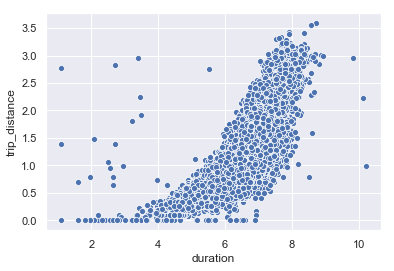

In [129]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
duration = np.log(train_df['duration']+1)
fare = np.log(train_df['trip_distance']+1)
ax = sns.scatterplot(x=duration, y=fare, data=train_df)

/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


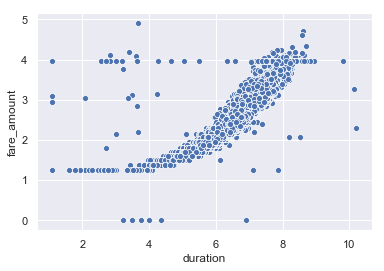

In [81]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
duration = np.log(train_df['duration']+1)
fare = np.log(train_df['fare_amount']+1)
ax = sns.scatterplot(x=duration, y=fare, data=train_df)
#Examining correlation between fare and duration shows a clear relationship when the outliers have been fixed with.

/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


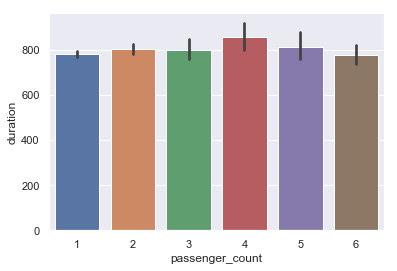

In [135]:
sns.barplot(x='passenger_count', y='duration', data=train_df);

In [21]:
len(train_df[train_df['fare_amount'] == 0])

5

In [25]:
train_df.columns

Index(['record_id', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'month', 'week_of_year', 'day_of_month', 'day_of_week', 'hour',
       'week_hour', 'manhattan', 'bearing', 'haversine'],
      dtype='object')

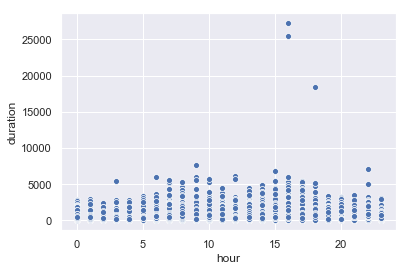

In [131]:
ax = sns.scatterplot(x='trip_distance', y='manhattan', data=train_df)
# ax = sns.scatterplot(x='hour', y='duration', data=train_df)
#Looks like the manhattan distance is over estimating the trip distance.

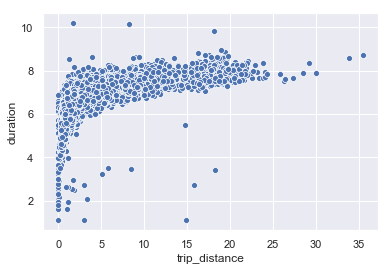

In [32]:
ax = sns.scatterplot(x='trip_distance', y=duration, data=train_df)


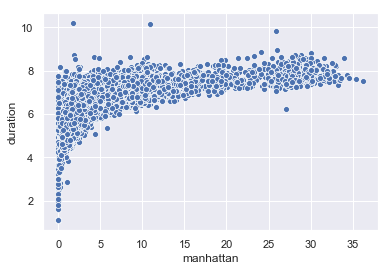

In [31]:
ax = sns.scatterplot(x='manhattan', y=duration, data=train_df)

In [91]:
print(len(test_df[(test_df['pickup_longitude'] == 0) | (test_df['dropoff_longitude'] == 0)]))
print(len(test_df[(test_df['pickup_latitude'] == 0) | (test_df['dropoff_latitude'] == 0)]))

0
0


/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


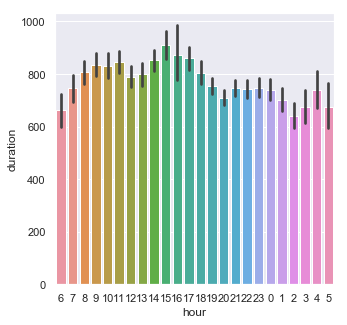

In [132]:
train_df['dist_duration_ratio'] = train_df['trip_distance']

fig, axes = plt.subplots(1, 1, figsize=(5,5))
order = np.roll(np.arange(24), -6)

train_count = train_df.groupby('hour').count()
train_count = train_df.reset_index()
sns.barplot(x='hour', y='duration', data=train_df, order=order);

/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


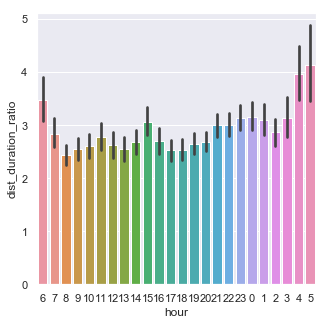

In [96]:
train_df['dist_duration_ratio'] = train_df['trip_distance']

fig, axes = plt.subplots(1, 1, figsize=(5,5))
order = np.roll(np.arange(24), -6)

train_count = train_df.groupby('hour').count()
train_count = train_df.reset_index()
sns.barplot(x='hour', y='dist_duration_ratio', data=train_df, order=order);

/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


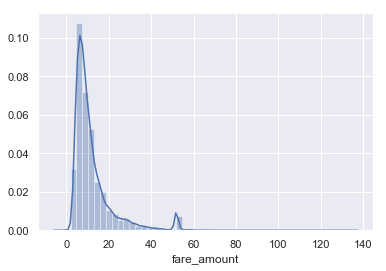

In [127]:
sns.distplot(train_df['fare_amount'])
#Looks like a small concentration of fares around 50. When I later looked up the pricing system for cabs in NYC I saw that this is a flat fare for trips to the airport.

In [95]:
# Copied from part 2
def haversine(lat1, lng1, lat2, lng2):
    """
    Compute haversine distance
    """
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    average_earth_radius = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * average_earth_radius * np.arcsin(np.sqrt(d))
    return h

# Copied from part 2
def manhattan_distance(lat1, lng1, lat2, lng2):
    """
    Compute Manhattan distance
    """
    a = haversine(lat1, lng1, lat1, lng2)
    b = haversine(lat1, lng1, lat2, lng1)
    return a + b

# Copied from part 2
def bearing(lat1, lng1, lat2, lng2):
    """
    Compute the bearing, or angle, from (lat1, lng1) to (lat2, lng2).
    A bearing of 0 refers to a NORTH orientation.
    """
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

# Copied from part 2
def add_time_columns(df):
    """
    Add temporal features to df
    """
    df.is_copy = False # propogate write to original dataframe
    df.loc[:, 'month'] = df['tpep_pickup_datetime'].dt.month
    df.loc[:, 'week_of_year'] = df['tpep_pickup_datetime'].dt.weekofyear
    df.loc[:, 'day_of_month'] = df['tpep_pickup_datetime'].dt.day
    df.loc[:, 'day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
    df.loc[:, 'hour'] = df['tpep_pickup_datetime'].dt.hour
    df.loc[:, 'week_hour'] = df['tpep_pickup_datetime'].dt.weekday * 24 + df['hour']
    return df

#Cleaning out values that have 0 longitude or 0 latitude, since this isnt in new york. Replaced these values with the mean of the lat and long.
def clean_longitude(df):
    mean_pickup_long = np.mean(df['pickup_longitude'].values)
    mean_dropoff_long = np.mean(df['dropoff_longitude'].values)
    pickup_func = lambda x : mean_pickup_long if x == 0 else x
    dropoff_func = lambda x : mean_dropoff_long if x == 0 else x
    df['pickup_longitude'] = df['pickup_longitude'].apply(pickup_func)
    df['dropoff_longitude'] = df['dropoff_longitude'].apply(dropoff_func)
    return df

def clean_latitude(df):
    mean_pickup_lat = np.mean(df['pickup_latitude'].values)
    mean_dropoff_lat = np.mean(df['dropoff_latitude'].values)
    pickup_func = lambda x : mean_pickup_lat if x == 0 else x
    dropoff_func = lambda x : mean_dropoff_lat if x == 0 else x
    df['pickup_latitude'] = df['pickup_latitude'].apply(pickup_func)
    df['dropoff_latitude'] = df['dropoff_latitude'].apply(dropoff_func)
    return df

def add_distance_columns(df):
    """
    Add distance features to df
    """
    df.is_copy = False # propogate write to original dataframe
    df.loc[:, 'manhattan'] = manhattan_distance(lat1=df['pickup_latitude'],
                                                lng1=df['pickup_longitude'],
                                                lat2=df['dropoff_latitude'],
                                                lng2=df['dropoff_longitude'])

    df.loc[:, 'bearing'] = bearing(lat1=df['pickup_latitude'],
                                   lng1=df['pickup_longitude'],
                                   lat2=df['dropoff_latitude'],
                                   lng2=df['dropoff_longitude'])
    df.loc[:, 'haversine'] = haversine(lat1=df['pickup_latitude'],
                                   lng1=df['pickup_longitude'],
                                   lat2=df['dropoff_latitude'],
                                   lng2=df['dropoff_longitude'])
    return df

def select_columns(data, *columns):
    return data.loc[:, columns]

In [83]:
def process_data_gm1(data, test=False):
    X = (
        data
        
        # Transform data
        .pipe(add_time_columns)
        .pipe(add_distance_columns)
        
        .pipe(clean_longitude)
        .pipe(clean_latitude)
        
        .pipe(select_columns,        
              'pickup_longitude',  
              'pickup_latitude',   
              'dropoff_longitude', 
              'dropoff_latitude',
              'fare_amount',
              'trip_distance',
              'hour'
             )
    )
    if test:
        y = None
    else:
        y = data['duration']
        
    return X, y

In [107]:
def mae(actual, predicted):
    """
    Calculates MAE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the MAE
    """
    
    mae = np.mean(np.abs(actual - predicted))
    return mae

In [108]:
# processed_data = process_data_gm1(train_df, True)


# submission_predictions = (guided_model_1
#                           .fit(X_train, y_train)
#                           .predict(X_test))
# submission_predictions = submission_predictions.astype(int)
# submission_predictions[submission_predictions < 0] = 0
# generate_submission(test_df, submission_predictions, True)


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import operator
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
[train, val] = train_test_split(train_df, test_size=0.1, random_state=42)


kf = KFold(n_splits=4)
for train_idx, valid_idx in kf.split(train):
    split_X_train, split_X_valid = train.iloc[train_idx], train.iloc[valid_idx]
    split_Y_train, split_Y_valid = train[['duration']].iloc[train_idx], train[['duration']].iloc[valid_idx]
    X_train, y_train = process_data_gm1(split_X_train)
    X_valid, y_valid = process_data_gm1(split_X_valid)
    
    guided_model_1 = lm.LinearRegression(fit_intercept=True)
#     guided_model_1.fit(X_train, y_train)
    
    submission_predictions = (guided_model_1
                          .fit(X_train, y_train)
                          .predict(X_valid))
    submission_predictions = submission_predictions.astype(int)
    print(mae(submission_predictions, y_valid))
    


/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


273.509779338014
266.56444332998996
270.3299899699097
278.56483571607725


In [118]:
test_data,a = process_data_gm1(test_df, True)
test_data
# submission_predictions = (guided_model_1
#                           .fit(X_train, y_train)
#                           .predict(test_data))
s = pd.Series(guided_model_1.predict(test_data))

/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/rileycampbell/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [124]:
s[s<0]

9155      -9.706157
11527   -432.339920
dtype: float64

In [126]:
np.mean(s)

860.4743198624702

---

# Project 2: NYC Taxi Rides
# Extras

Put all of your extra work in here. Feel free to save figures to use when completing Part 4.

## Submission

You're almost done!

Before submitting this assignment, ensure that you have:

1. Restarted the Kernel (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Validated the notebook by clicking the "Validate" button.

Then,

1. **Submit** the assignment via the Assignments tab in **Datahub** 
1. **Upload and tag** the manually reviewed portions of the assignment on **Gradescope**